In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
tf=pd.read_csv('TaxiFare.csv')

In [13]:
tf.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [14]:
tf.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [15]:
tf.shape

(50000, 8)

Text(0.5, 1.0, 'Histogrm of Taxi Fare amount')

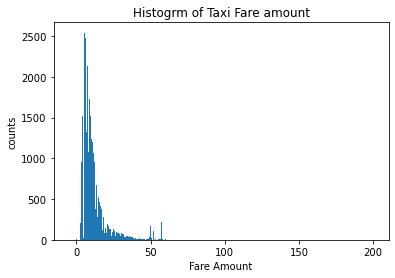

In [16]:
#histogram
plt.hist(tf.amount, bins='auto')
plt.xlabel('Fare Amount')
plt.ylabel('counts')
plt.title('Histogrm of Taxi Fare amount')

<AxesSubplot:>

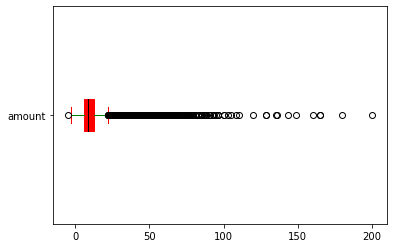

In [17]:
#Boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
tf.amount.plot.box(color=props2, patch_artist = True, vert = False) #Outliers

In [18]:
#Getting the Iqr, up_lim & low_lim
iqr = tf.amount.describe()['75%'] - tf.amount.describe()['25%'] 
iqr #6.5 
low_lim = tf.amount.describe()['25%']-1.5*iqr #-3.75
len(tf.amount[tf.amount < low_lim]) #1
up_lim = tf.amount.describe()['75%']+1.5*iqr #22.5
len(tf.amount[tf.amount > up_lim]) #4364 ie 8.7% of data

4364

In [19]:

#Getting the count of values 
tf.amount.value_counts()
len(tf.amount[tf.amount <0]) #6
len(tf.amount[tf.amount >150]) #5
len(tf.amount[tf.amount >100]) #16
len(tf.amount[tf.amount >50]) #636

636

In [20]:
#______________________________2 date_time_of_pickup
tf.date_time_of_pickup.describe()
tf.info()
#Converting Date & Time variable from object to datetime type
tf.date_time_of_pickup = pd.to_datetime(tf.date_time_of_pickup)
tf.info()
tf.date_time_of_pickup.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount            

0   2009-06-15 17:26:21+00:00
1   2010-01-05 16:52:16+00:00
2   2011-08-18 00:35:00+00:00
3   2012-04-21 04:30:42+00:00
4   2010-03-09 07:51:00+00:00
Name: date_time_of_pickup, dtype: datetime64[ns, UTC]

In [21]:

#Extracting Year,Month,Day, Hour
tf['year'] = tf["date_time_of_pickup"].dt.year
tf['month'] = tf["date_time_of_pickup"].dt.month_name()
tf['day'] = tf["date_time_of_pickup"].dt.day_name()
tf['hour'] = tf["date_time_of_pickup"].dt.hour #24hours time

Text(0.5, 1.0, 'Yearwise counting')

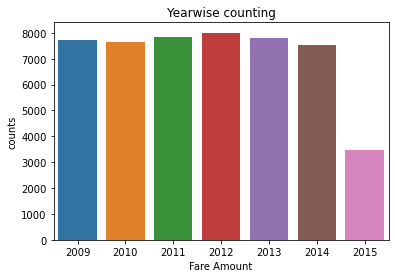

In [22]:
#_______________3 year
#Barplot/ Countplot
sns.countplot(x='year', data=tf)
plt.xlabel("Fare Amount")
plt.ylabel('counts')
plt.title("Yearwise counting")

In [23]:
tf.year.value_counts()
'''
2012    8005
2011    7832
2013    7819
2009    7716
2010    7646
2014    7530
2015    3452'''

'\n2012    8005\n2011    7832\n2013    7819\n2009    7716\n2010    7646\n2014    7530\n2015    3452'

<AxesSubplot:>

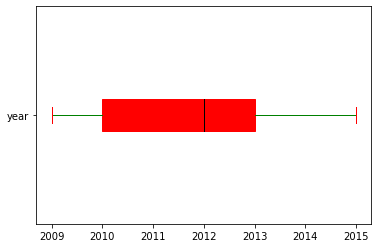

In [24]:
#Boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
tf.year.plot.box(color=props2, patch_artist = True, vert = False) # No Outliers" and of no use 

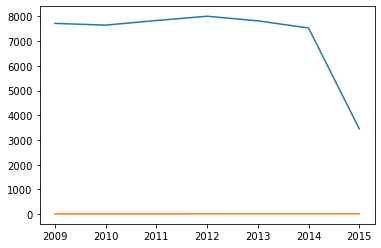

In [46]:
tf.groupby('year')['amount'].describe()

plt.plot(tf.groupby('year')['amount'].count())
plt.plot(tf.groupby('year')['amount'].mean())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'June'),
  Text(1, 0, 'January'),
  Text(2, 0, 'August'),
  Text(3, 0, 'April'),
  Text(4, 0, 'March'),
  Text(5, 0, 'November'),
  Text(6, 0, 'December'),
  Text(7, 0, 'September'),
  Text(8, 0, 'July'),
  Text(9, 0, 'February'),
  Text(10, 0, 'May'),
  Text(11, 0, 'October')])

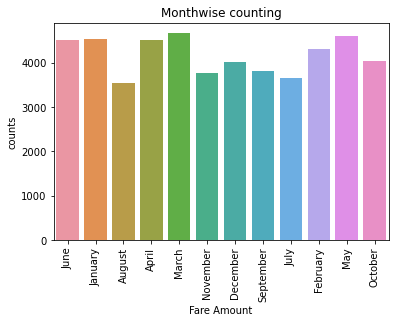

In [26]:
#__________________4 month
#Barplot/ Countplot
sns.countplot(x='month', data=tf)
plt.xlabel("Fare Amount")
plt.ylabel('counts')
plt.title("Monthwise counting")
plt.xticks(rotation=90)

In [44]:
tf.groupby('month')['amount'].describe() # will be alphabetic


,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,4546.0,10.700930,9.235979,2.5,5.7,8.0,11.7,180.00
2,4302.0,10.933728,9.510653,0.0,6.0,8.1,12.1,200.00
3,4671.0,11.085596,9.172258,-5.0,5.8,8.1,12.5,80.50
4,4519.0,11.321361,9.487037,-2.5,6.0,8.5,12.5,93.75
5,4612.0,11.868103,10.307439,0.0,6.1,8.9,13.3,160.00
6,4516.0,11.457146,9.267060,2.5,6.1,8.5,13.0,96.25
7,3656.0,10.937166,8.947714,2.5,6.0,8.1,12.1,120.00
8,3543.0,11.316616,10.315227,-3.0,6.0,8.5,12.5,165.00
9,3810.0,11.970438,10.031989,2.5,6.1,8.9,13.5,96.00


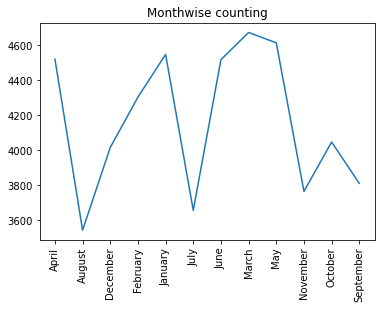

In [28]:
#Plots for COUNTS as per alphabetical order
plt.plot(tf.groupby('month')['amount'].count())
plt.xticks(rotation=90)
plt.title("Monthwise counting")
plt.show()


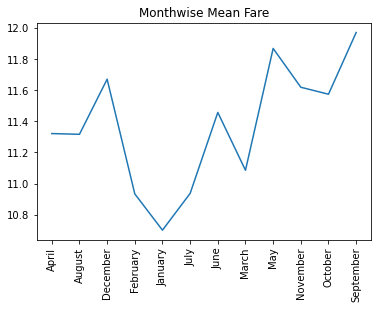

In [29]:
# plot for MEAN
plt.plot(tf.groupby('month')['amount'].mean())
plt.xticks(rotation=90)
plt.title("Monthwise Mean Fare")
plt.show()

In [30]:
#Creating dict file
month = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5,
         'June':6, 'July':7, 'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
#Converting month names to numbers
tf.month = [month[item] for item in tf.month]
print(tf.month)
tf.info()

0         6
1         1
2         8
3         4
4         3
         ..
49995     6
49996     6
49997     1
49998    11
49999     1
Name: month, Length: 50000, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
 8   year                  50000 non-null  int64              
 9   month               

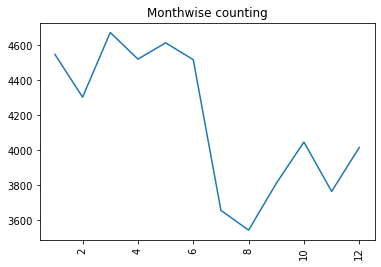

In [31]:
# Plot COUNTS as per calendar [nos]
plt.plot(tf.groupby('month')['amount'].count())
plt.xticks(rotation=90)
plt.title("Monthwise counting")
plt.show()

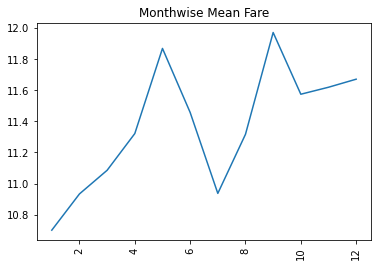

In [32]:
# Plot MEAN as per calendar [nos]
plt.plot(tf.groupby('month')['amount'].mean())
plt.xticks(rotation=90)
plt.title("Monthwise Mean Fare")
plt.show()

Text(0.5, 1.0, 'Weekday wise counting')

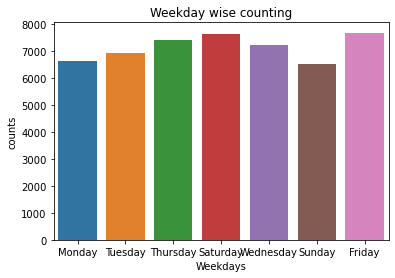

In [33]:
#____________________________5 day
#Barplot/ Countplot
sns.countplot(x='day', data=tf)
plt.xlabel("Weekdays")
plt.ylabel('counts')
plt.title("Weekday wise counting")

In [43]:
tf.groupby('day')['amount'].describe()


,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
1,6518.0,11.520578,9.954766,-2.5,6.0,8.5,13.0,200.00
2,6639.0,11.569060,10.536296,-5.0,6.0,8.1,12.5,160.00
3,6927.0,11.166999,9.282690,-2.9,6.0,8.5,12.5,92.49
4,7212.0,11.104773,9.357399,2.5,6.0,8.5,12.5,180.00
5,7406.0,11.668594,9.983516,-2.5,6.0,8.5,13.0,149.00
6,7668.0,11.402240,9.508604,-3.0,6.1,8.5,13.0,165.00
7,7630.0,11.142731,9.201668,2.5,6.0,8.5,12.5,165.00


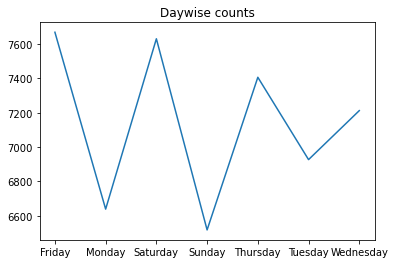

In [35]:
#Plots of daywise in alphabetical order
plt.plot(tf.groupby('day')['amount'].count())
plt.title("Daywise counts")
plt.show()

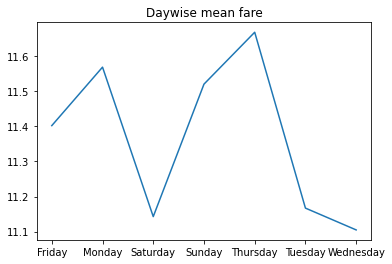

In [36]:
plt.plot(tf.groupby('day')['amount'].mean())
plt.title("Daywise mean fare")
plt.show()

In [37]:
#Creating dict file
day = {'Sunday':1,'Monday':2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5, 
       'Friday':6, 'Saturday':7 }

In [38]:
#Converting weekdays names into numbers
tf.day = [day[item] for item in tf.day]
tf.day.head()
tf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
 8   year                  50000 non-null  int64              
 9   month                 50000 non-null  int64              
 10  day                   50000 non-null  int64              
 11  hour                  50000 non-null  int64              
dtypes: d

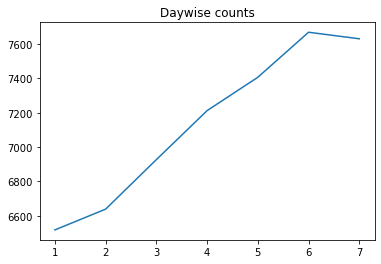

In [39]:
#Plots of daywise in order sunday to Saturday
plt.plot(tf.groupby('day')['amount'].count())
plt.title("Daywise counts")
plt.show()

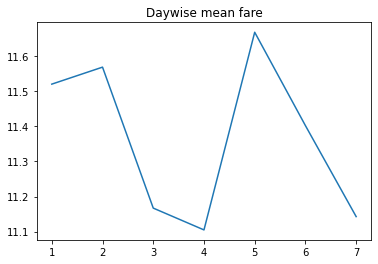

In [40]:
plt.plot(tf.groupby('day')['amount'].mean())
plt.title("Daywise mean fare")
plt.show()


Text(0.5, 1.0, 'Hourly counting')

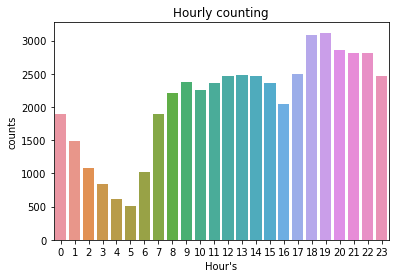

In [41]:
#____________________6 hour
#Barplot/ Countplot
sns.countplot(x='hour', data=tf)
plt.xlabel("Hour's")
plt.ylabel('counts')
plt.title("Hourly counting")

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,1890.0,11.922873,8.592224,2.5,6.50,9.30,14.50,88.25
1,1484.0,11.726065,9.043038,2.5,6.50,9.00,14.10,128.83
2,1088.0,11.246765,8.628222,2.5,6.10,8.90,13.70,136.00
3,847.0,12.087237,12.358673,2.5,6.00,8.90,14.50,200.00
4,610.0,13.740623,10.944349,2.5,6.50,10.00,17.70,80.35
5,508.0,15.338209,14.856332,-2.5,5.95,9.15,18.60,82.50
6,1017.0,12.280570,12.168081,2.5,5.30,7.70,12.50,78.50
7,1899.0,11.121827,10.251250,2.5,5.70,8.00,11.70,87.00
8,2209.0,10.611852,8.604485,-3.0,6.00,8.10,11.70,95.00


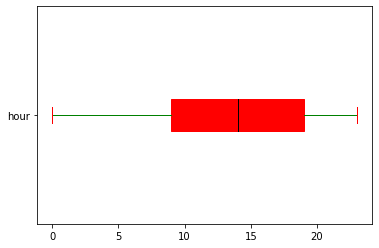

In [42]:
#Boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
tf.hour.plot.box(color=props2, patch_artist = True, vert = False)
tf.groupby('hour')['amount'].describe()

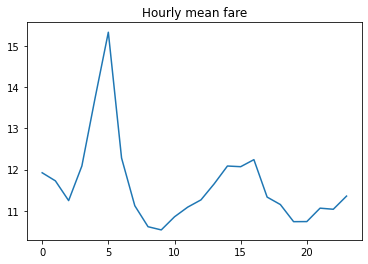

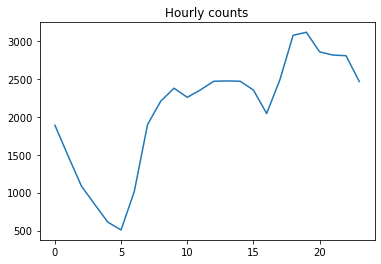

In [47]:
plt.plot(tf.groupby('hour')['amount'].mean())
plt.title("Hourly mean fare")
plt.show()

plt.plot(tf.groupby('hour')['amount'].count())
plt.title("Hourly counts")
plt.show()

In [ ]:
#___________________________________below is for interest sake only! 
#_______________________IGNORE DIST TRAVELLED 

#Distance in miles
def distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

tf['distance_travelled'] = distance(tf.latitude_of_pickup, tf.longitude_of_pickup,
                                    tf.latitude_of_dropoff, tf.longitude_of_dropoff)
tf.distance_travelled.head()


In [ ]:
#Histogram - There will be difficulty in reading histogram; Better ignore! 
#Takes little time to execute
plt.hist(tf.distance_travelled, bins='auto')
plt.xlabel("Distance Travelled")
plt.ylabel('counts')
plt.title("Histogram of Distance Travelled")

In [50]:
tf.distance_travelled.describe()

count    50000.000000
mean        11.500926
std        220.937422
min          0.000000
25%          0.760028
50%          1.317378
75%          2.420595
max       5385.932977
Name: distance_travelled, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance_travelled', ylabel='amount'>

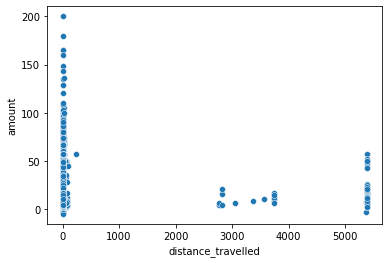

In [51]:
#Scatter plot Distance vs Amount; Looks strange!!
sns.scatterplot(tf.distance_travelled, tf.amount)


<AxesSubplot:>

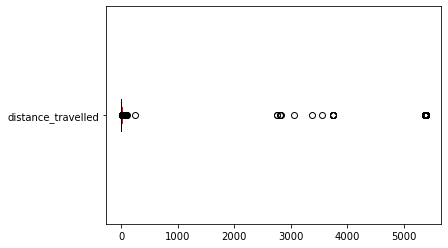

In [52]:
#Boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
tf.distance_travelled.plot.box(color=props2, patch_artist = True, vert = False)

In [53]:
#________________________________7 no_of_passenger
tf.no_of_passenger.describe()

count    50000.000000
mean         1.667840
std          1.289195
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: no_of_passenger, dtype: float64

In [54]:
tf.no_of_passenger.value_counts()

1    34808
2     7386
5     3453
3     2183
4     1016
6      989
0      165
Name: no_of_passenger, dtype: int64

Text(0.5, 1.0, "No of Passenger's")

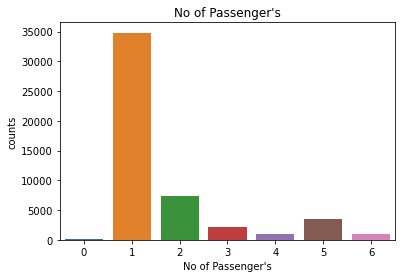

In [55]:
#Barplot/ Countplot
sns.countplot(x='no_of_passenger', data=tf)
plt.xlabel("No of Passenger's")
plt.ylabel('counts')
plt.title("No of Passenger's")

<AxesSubplot:>

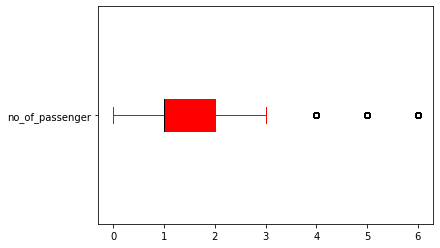

In [56]:
#Boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
tf.no_of_passenger.plot.box(color=props2, patch_artist = True, vert = False)

In [59]:
import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [60]:

#Splitting the Dataset
tf.info()
x = tf.iloc[:,3:12] #9 Predictors [dist not included]; 12th will not be picked!
x.info()
y = tf.iloc[:,1] # amount

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
 8   year                  50000 non-null  int64              
 9   month                 50000 non-null  int64              
 10  day                   50000 non-null  int64              
 11  hour                  50000 non-null  int64              
 12  dist

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=123)
len(x_train) #35000
len(x_test) #15000
len(y_train) #35000
len(y_test) #15000

15000

In [62]:
#Decision Tree
clf = tree.DecisionTreeRegressor()
tf_clf = clf.fit(x_train, y_train)

In [63]:
#Prediction
y_pred = tf_clf.predict(x_test)

In [64]:
#RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mse)
print(RMSE) #6.42

6.54253825310432


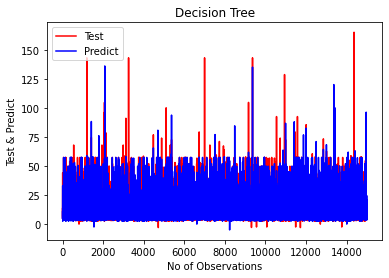

In [66]:
#plot
len(y_test) # 15000
obs_No = list(range(1, 15001))
xaxis = obs_No

plt.plot(xaxis, y_pred, 'r')
plt.plot(xaxis, y_test, 'b')
plt.xlabel('No of Observations')
plt.ylabel('Test & Predict')
plt.title('Decision Tree')
plt.legend(labels= ('Test', 'Predict'), loc= 'upper left')
plt.show()


In [70]:
#___________________________________________________Random Forest
rfr = RandomForestRegressor(n_estimators = 300) 
tf_rfr = rfr.fit(x_train, y_train) # takes time!

In [71]:
#Prediction
y_pred = tf_rfr.predict(x_test)


In [72]:
#RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mse)
print(RMSE) #4.39


4.358095766003972
